In [60]:
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import ehtim as eh
import nfft as NFFT
from   ehtim.calibrating import self_cal as sc
import time
# import vlbi_imaging_utils as vb

In [21]:
%pip install vlbi_imaging_utils

ERROR: Could not find a version that satisfies the requirement vlbi_imaging_utils
ERROR: No matching distribution found for vlbi_imaging_utils
Note: you may need to restart the kernel to use updated packages.


In [15]:
obs = eh.obsdata.load_uvfits('./data/Dataset_01.uvfits')
#obs = eh.obsdata.load_uvfits('./data/Dataset_02.uvfits')
#obs = eh.obsdata.load_uvfits('./data/Dataset_03.uvfits')

Loading uvfits:  ./data/Dataset_01.uvfits
no IF in uvfits header!
POLREP_UVFITS: circ
Number of uvfits Correlation Products: 4
No NX table in uvfits!


/Users/jiahuitang/opt/anaconda3/lib/python3.8/site-packages/ehtim/obsdata.py:4034: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  x.plot(data[field1], data[field2], marker, markersize=markersize, color=color,


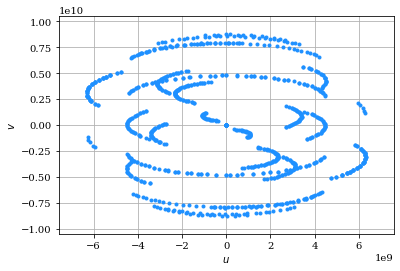

<AxesSubplot:xlabel='$u$', ylabel='$v$'>

In [16]:
obs.plotall('u','v', conj=True)

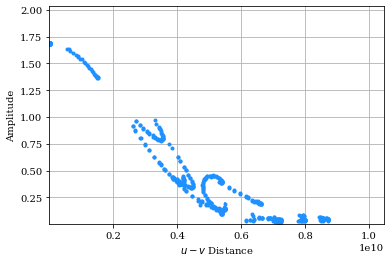

/Users/jiahuitang/opt/anaconda3/lib/python3.8/site-packages/ehtim/obsdata.py:4034: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  x.plot(data[field1], data[field2], marker, markersize=markersize, color=color,


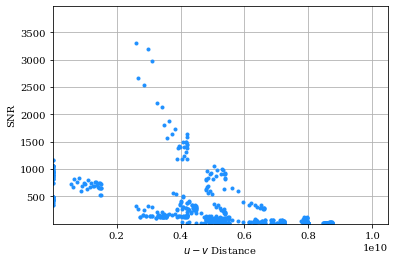

<AxesSubplot:xlabel='$u-v$ Distance', ylabel='SNR'>

In [9]:
obs.plotall('uvdist','amp')

# “snr”, “sigma”, “qamp”,
# ”uamp”,” vamp” , “m

obs.plotall('uvdist','snr')

/Users/jiahuitang/opt/anaconda3/lib/python3.8/site-packages/ehtim/obsdata.py:4034: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  x.plot(data[field1], data[field2], marker, markersize=markersize, color=color,


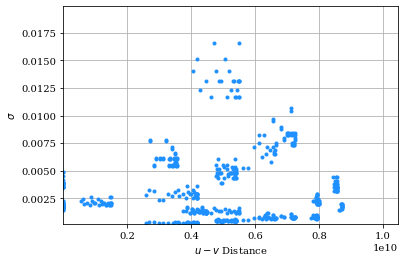

<AxesSubplot:xlabel='$u-v$ Distance', ylabel='$\\sigma$'>

In [17]:
obs.plotall('uvdist','sigma')

/Users/jiahuitang/opt/anaconda3/lib/python3.8/site-packages/ehtim/obsdata.py:4031: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  x.errorbar(data[field1], data[field2], xerr=sigx, yerr=sigy, label=labelstr,


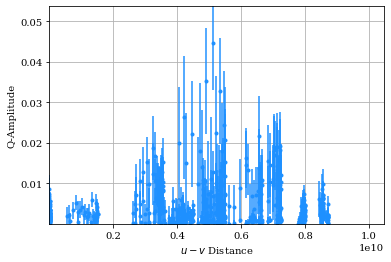

<AxesSubplot:xlabel='$u-v$ Distance', ylabel='Q-Amplitude'>

In [18]:
obs.plotall('uvdist','qamp')

/Users/jiahuitang/opt/anaconda3/lib/python3.8/site-packages/ehtim/obsdata.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(datalist)


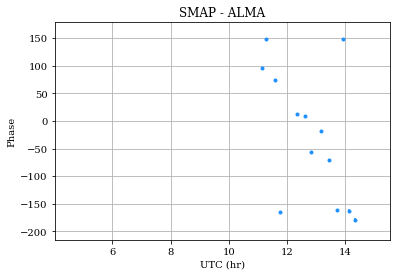

<AxesSubplot:title={'center':'SMAP - ALMA'}, xlabel='UTC (hr)', ylabel='Phase'>

In [20]:
obs.plot_bl('SMAP','ALMA', 'phase')

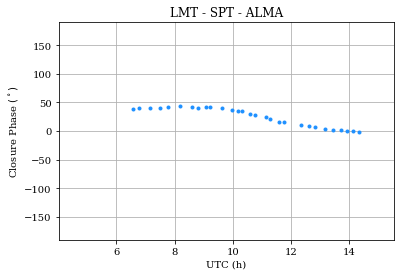

<AxesSubplot:title={'center':'LMT - SPT - ALMA'}, xlabel='UTC (h)', ylabel='Closure Phase $(^\\circ)$'>

In [11]:
obs.plot_cphase('LMT', 'SPT', 'ALMA')

In [23]:
vb.RADPERUAS

NameError: name 'vb' is not defined

In [34]:
npix = 128
# fov = 200 * vb.RADPERUAS
fov = 500

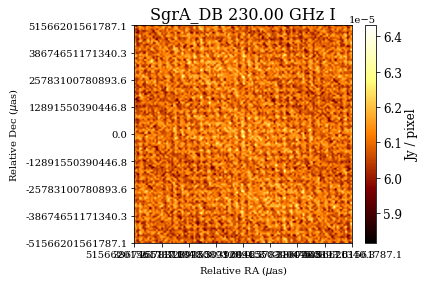

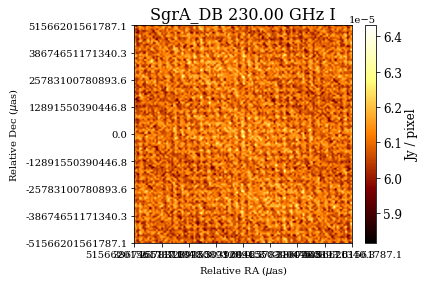

In [35]:
dbeam = obs.dirtybeam(npix, fov)
dbeam.display()

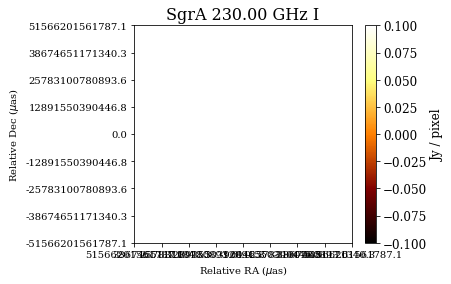

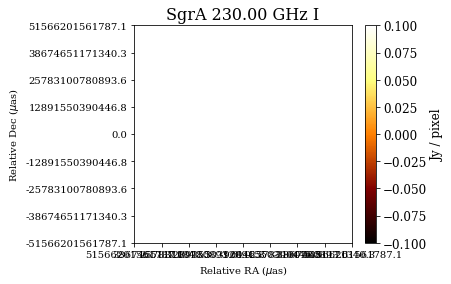

In [36]:
cbeam = obs.cleanbeam(npix,fov)
cbeam.display()

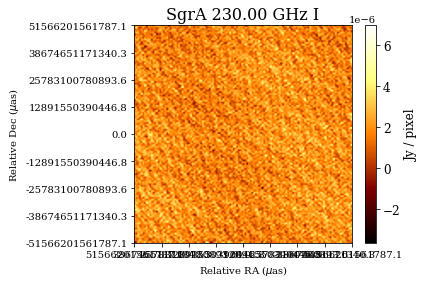

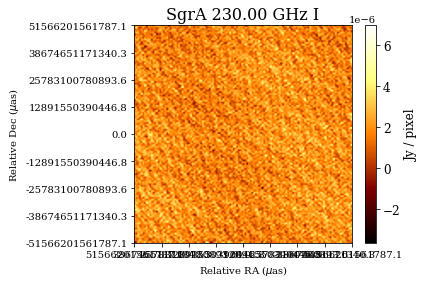

In [37]:
dim = obs.dirtyimage(npix, fov)
dim.display()

In [41]:
beamparams = obs.fit_beam()
beamparams

array([1.21082104e-10, 8.06515542e-11, 1.27817608e+00])

In [40]:
res = obs.res()
res

1.145458524202044e-10

In [42]:
zbl = 2.5
prior_fwhm = 500
gaussparams = (prior_fwhm, prior_fwhm, 0.0)

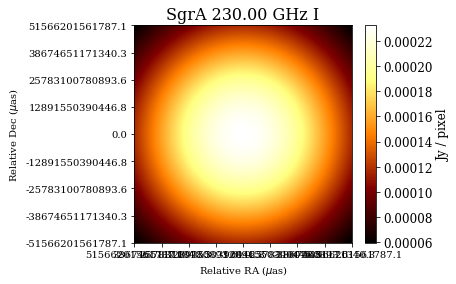

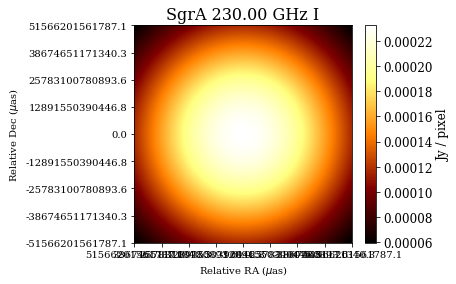

In [43]:
emptyprior = eh.image.make_square(obs, npix, fov)
gaussprior = emptyprior.add_gauss(zbl, gaussparams)
gaussprior.display()

Generating I image...
Warning! Pixel Spacing is larger than smallest spatial wavelength!
Warning! Specified flux is > 120% of maximum visibility amplitude!
Initial S_1: -0.000000 S_2: 0.000000 S_3: 0.000000
Initial Chi^2_1: 161021.327957 Chi^2_2: 1.000000 Chi^2_3: 1.000000
Initial Objective Function: 8074858.255745
Total Data 1:  564
Total Pixel #:  16384
Clipped Pixel #:  16384

i: 0 chi2_1: 161021.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00


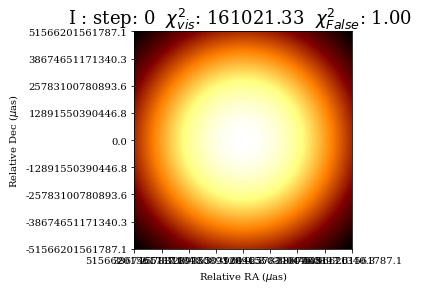

i: 1 chi2_1: 161021.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00


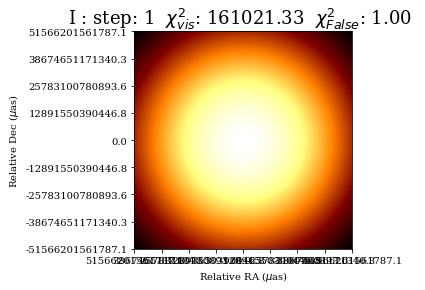

i: 2 chi2_1: 161021.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00


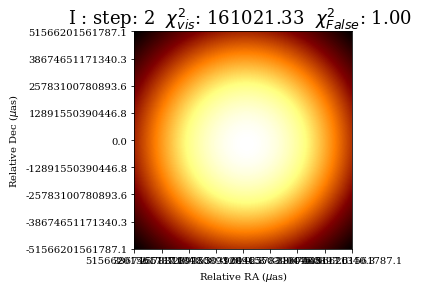

i: 3 chi2_1: 161021.33 chi2_2: 1.00 chi2_3: 1.00 s_1: 0.00 s_2: 0.00 s_3: 0.00
time: 0.855372 s
J: 8051016.398425
Final Chi^2_1: 161021.327957 Chi^2_2: 1.000000  Chi^2_3: 1.000000
CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH


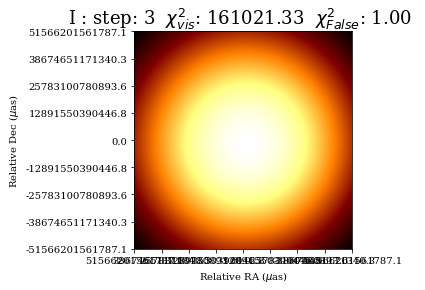

In [45]:
out = eh.imager_func(obs, gaussprior, gaussprior, zbl, d1='vis', alpha_d1=50, s1='gs',maxit=100)

# Blur and Restart

In [46]:
outblur = out.blur_gauss(beamparams, 0.5)

In [47]:
out = outblur
out = eh.imager_func(obs, out, out, zbl, d1='vis', alpha_d1=10 ,s1="gs",maxit=150)

Generating I image...
Warning! Pixel Spacing is larger than smallest spatial wavelength!
Warning! Specified flux is > 120% of maximum visibility amplitude!


Exception: clipfloor too large: all prior pixels have been clipped!

In [49]:
outblur = out.blur_gauss(beamparams, 0.5)

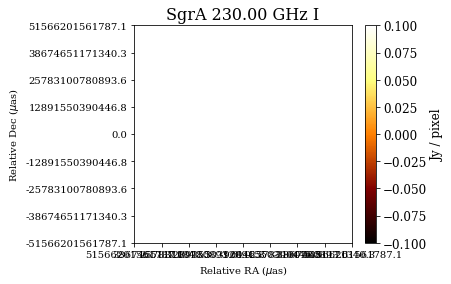

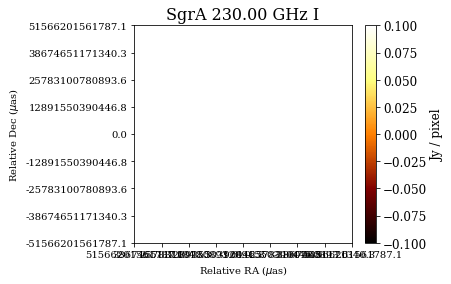

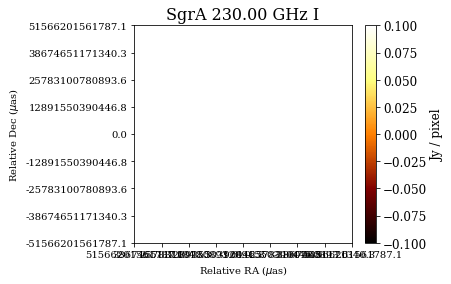

In [50]:
out.display()
outblur.display()

In [51]:
# imageout.save_fits('./sgraim.fits')
# outblur.save_fits('./sgraim_blur.fits')

In [61]:
eh.plotting.comp_plots.plotall_obs_im_compare(obs, out, "uvdist", "amp")

Producing clean visibilities from image with nfft FT . . . 


NameError: name 'NFFT' is not defined

In [56]:
eh.plotting.comp_plots.plotall_obs_im_compare(obs, out, "uvdist", "phase")

Producing clean visibilities from image with nfft FT . . . 


NameError: name 'NFFT' is not defined